In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

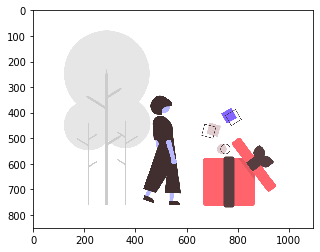

In [2]:
image = cv2.imread("images/gift_box.png")
plt.imshow(image)

### See the image above and understand the co-ordinate system.

### X axis is similar to our normal system. However, Y axis starts at 0 from top!
### Where is the 0,0 co-ordinate in the image?

In [11]:
print("Image data type: {}\nImage shape: {}\nSingle Image Channel Shape: {}\nSingle Image Channel: {}".format(type(image), image.shape, image[:, :, 0].shape, image[:, :, 0]))

Image data type: <class 'numpy.ndarray'>
Image shape: (851, 1097, 3)
Single Image Channel Shape: (851, 1097)
Single Image Channel: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Channel 1 (Blue): 


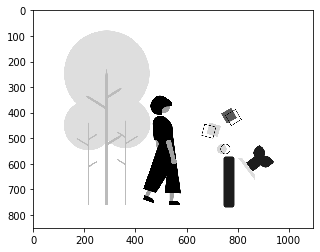

Channel 2 (Green): 


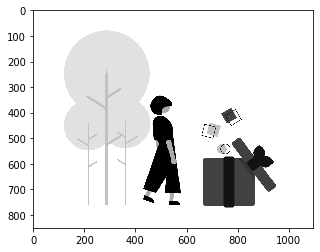

Channel 3 (Red): 


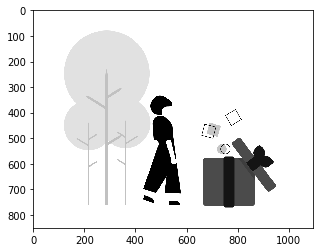

In [17]:
# See single channel

print("Channel 1 (Blue): ")
plt.imshow(image[:, :, 0], cmap='gray')
plt.show()

print("Channel 2 (Green): ")
plt.imshow(image[:, :, 1], cmap='gray')
plt.show()

print("Channel 3 (Red): ")
plt.imshow(image[:, :, 2], cmap='gray')
plt.show()

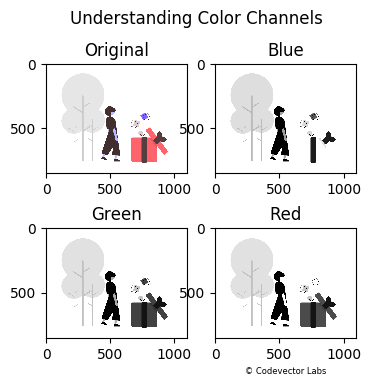

In [34]:
# See all images in grid

legends_array = ["Original", "Blue", "Green", "Red"]
images_array = [image, image[:,:,0], image[:,:,1], image[:,:,2]] # Original, Blue Channel, Green Channel, Red Channel

fig = plt.figure(figsize=(4,4), dpi=100) # specifying the overall grid size

for i in range(4):
    ax = plt.subplot(2,2,i+1)
    ax.title.set_text(legends_array[i])
    plt.imshow(images_array[i], cmap='gray')

fig.suptitle("Understanding Color Channels")
plt.xlabel("© Codevector Labs", fontsize=6)
plt.show()
fig.savefig('images/output_3_understanding_channels.png', dpi=200)